# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

## Task 1
#Using .describe to get an overview of numerical data, checking mean, min and max values. 
flight.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


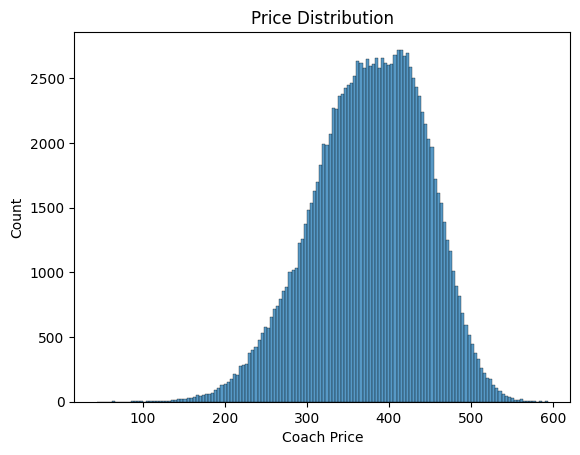

<Figure size 640x480 with 0 Axes>

In [3]:
#Histogram to show the price distribution
sns.histplot(flight.coach_price)
plt.title("Price Distribution")
plt.xlabel("Coach Price")
plt.show()
plt.clf()

Coach prices are between 44 and 594 dollars, with a mean of 376 dollars. 500 dollars for a coach ticket is oon the higher end of the spectrum

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.834377372817
437.115


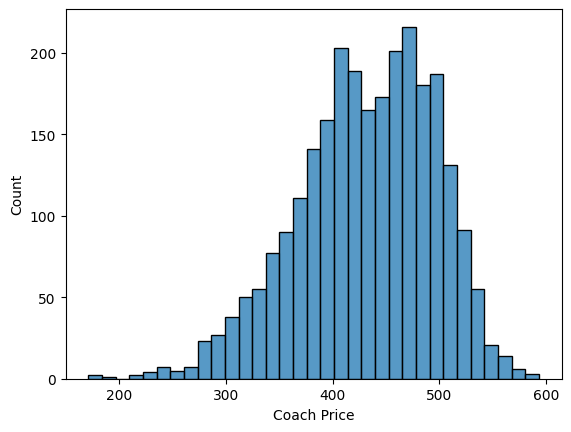

<Figure size 640x480 with 0 Axes>

In [4]:
## Task 2
flight_8_hours_mean = np.mean(flight.coach_price[flight["hours"] == 8])
flight_8_hours_median = np.median(flight.coach_price[flight["hours"] == 8])

print(flight_8_hours_mean)
print(flight_8_hours_median)

sns.histplot(flight.coach_price[flight["hours"] == 8])
plt.xlabel("Coach Price")
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

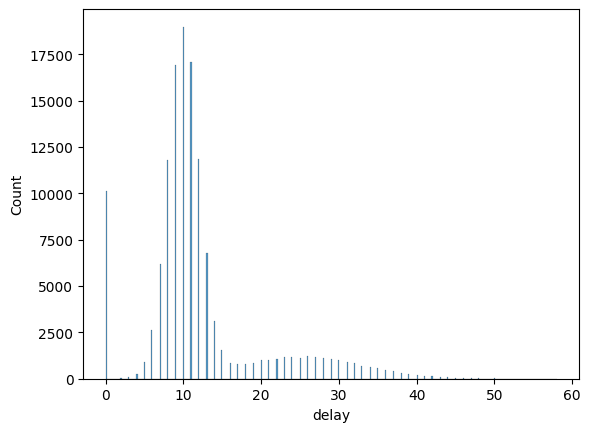

<Figure size 640x480 with 0 Axes>

In [5]:
## Visualize flight delays
sns.histplot(flight.delay[flight.delay <= 500])
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

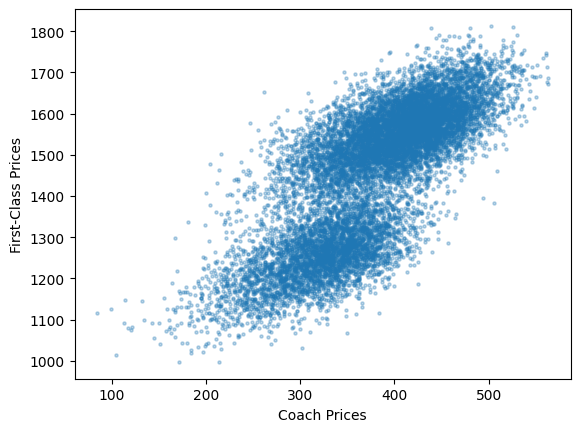

In [19]:
## Task 4

#Random sample from dataset as dataset is very large
perc = 0.10
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

#Scatter plot to show the relationship between coach prices and first-class prices
plt.scatter(flight_sub.coach_price, flight_sub.firstclass_price, alpha=0.3, s=5)
plt.xlabel("Coach Prices")
plt.ylabel("First-Class Prices")
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

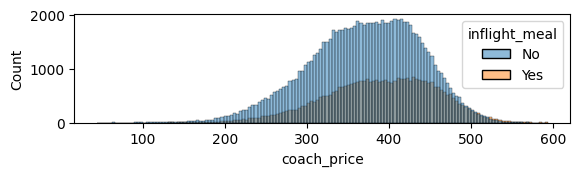

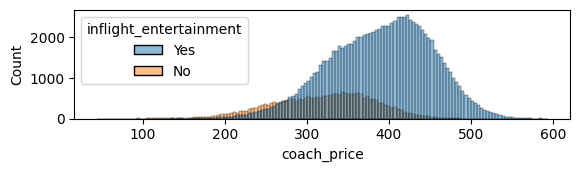

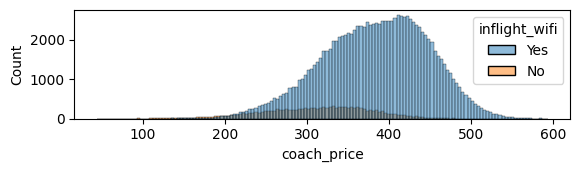

<Figure size 640x480 with 0 Axes>

In [32]:
## Task 5

#Plotting coach prices and inflight meals
ax1 = plt.subplot(3, 1, 1)
sns.histplot(flight, x=flight.coach_price, hue=flight.inflight_meal)
plt.show()

#Plotting coach prices and inflight entertainment
ax2 = plt.subplot(3, 1, 2)
sns.histplot(flight, x=flight.coach_price, hue=flight.inflight_entertainment)
plt.show()

#Plotting coach prices and inflight wifi
ax3 = plt.subplot(3, 1, 3)
sns.histplot(flight, x=flight.coach_price, hue=flight.inflight_wifi)
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

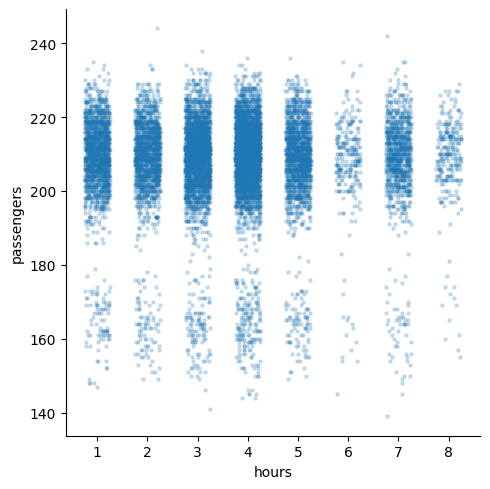

<Figure size 640x480 with 0 Axes>

In [41]:
## Task 6
sns.lmplot(x="hours", y="passengers", data=flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

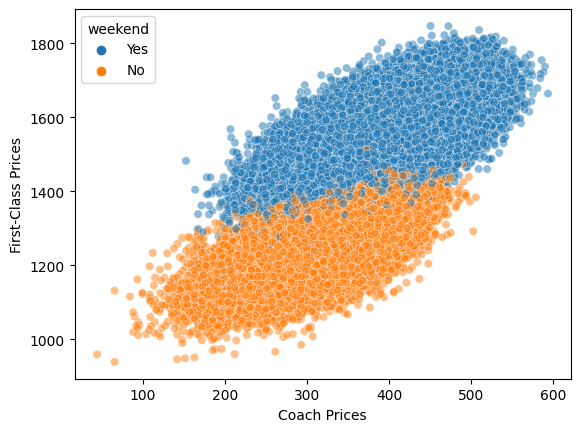

In [46]:
## Task 7
sns.scatterplot(x="coach_price", y="firstclass_price", data=flight, hue="weekend", alpha=0.5)
plt.xlabel("Coach Prices")
plt.ylabel("First-Class Prices")
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

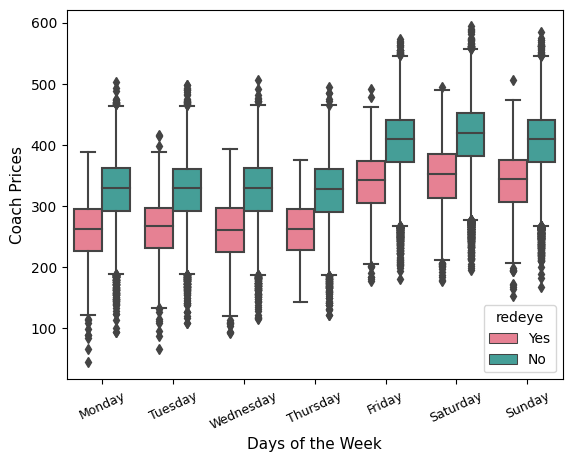

In [60]:
## Task 8

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight, palette="husl", order=days_order)
plt.xticks(rotation=25, fontsize=9)
plt.xlabel("Days of the Week", fontsize= 11)
plt.ylabel("Coach Prices", fontsize=11)
plt.show()
